Com problemas quando tem ruído, usar stream mux??

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api

In [3]:
from scipy.io import wavfile
fs, data = wavfile.read("song.wav")

In [4]:
fs

44100

In [5]:
with open("song.wav", "rb")as f:
    _ = f.read()

In [6]:
data.shape

(4454100, 2)

In [7]:
data.dtype

dtype('int16')

In [8]:
#data2 = data[:4454100//8].ravel()

In [9]:
eightBit = np.array(((data[:len(data)//8] + 32768)) >> 8, dtype = np.uint8)

In [10]:
wavfile.write("reduced.wav", fs , eightBit)

In [63]:
prefix = np.array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype = np.uint8)
prefix

array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [64]:
with open("prefixData.data", "wb") as f:
    f.write(prefix)
    f.write(eightBit)

In [65]:
with open("output.data", "rb") as f:
    _ = f.read()

rcv = np.frombuffer(_, dtype = np.uint8)

In [66]:
rcv.shape

(1113646,)

In [67]:
np.unpackbits(rcv)

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [68]:
%%time
roll = np.argmax(np.correlate(np.unpackbits(rcv), np.unpackbits(prefix)))

CPU times: user 23.5 s, sys: 3.57 ms, total: 23.5 s
Wall time: 23.5 s


In [69]:
rcv = np.packbits(np.roll(np.unpackbits(rcv), -roll))[len(prefix):]

In [70]:
rcv = rcv.reshape(-1, 2)

In [71]:
rcv

array([[128, 127],
       [128, 127],
       [128, 127],
       ...,
       [128, 127],
       [128, 127],
       [127, 127]], dtype=uint8)

In [72]:
a = rcv.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

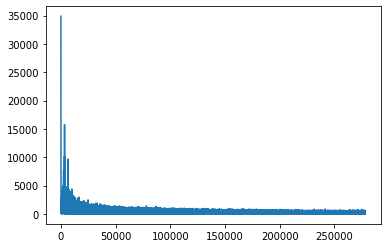

In [73]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [74]:
wavfile.write("outputGnuRadio.wav", fs, rcv)

In [22]:
eightBit.shape

(556762, 2)

In [23]:
bits = np.unpackbits(eightBit.ravel())

In [24]:
bits[:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [25]:
bits ^= np.random.random(bits.shape) < 0.001

In [26]:
bits[:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [27]:
np.mean(np.equal(bits, np.unpackbits(eightBit.ravel())))

0.9990133800438967

In [28]:
final = np.packbits(bits).reshape(eightBit.shape)

In [29]:
wavfile.write("BSC.wav", fs , final)

In [30]:
eightBit + np.random.randn()

array([[127.42455712, 127.42455712],
       [127.42455712, 127.42455712],
       [127.42455712, 127.42455712],
       ...,
       [109.42455712, 135.42455712],
       [109.42455712, 136.42455712],
       [110.42455712, 137.42455712]])

In [31]:
cvtNoise = eightBit/255 + 0.005 * np.random.randn(eightBit.shape[0], eightBit.shape[1])

In [32]:
cvtNoise

array([[0.5071628 , 0.49146328],
       [0.50790558, 0.50079449],
       [0.51507748, 0.49732969],
       ...,
       [0.42864348, 0.53309313],
       [0.43212735, 0.53699888],
       [0.43965836, 0.54687359]])

In [33]:
wavfile.write("cvtNoise.wav", fs, cvtNoise)

In [34]:
fs, data = wavfile.read('reduced.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

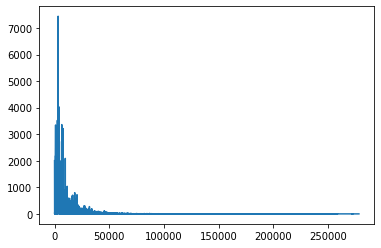

In [35]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [36]:
fs, data = wavfile.read('BSC.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

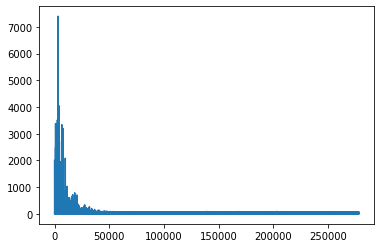

In [37]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [38]:
fs, data = wavfile.read('cvtNoise.wav') # load the data
a = data.T[0] * 255 # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

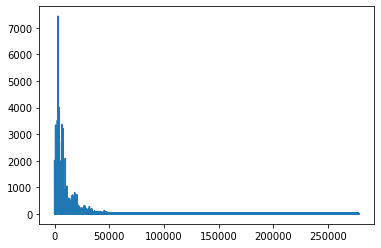

In [39]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [40]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [41]:
order = 6
fs = 44100      # sample rate, Hz
cutoff = 800  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

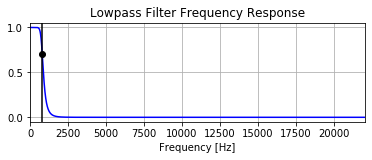

In [42]:
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [43]:
y = butter_lowpass_filter((cvtNoise * 255).astype(np.uint8), cutoff, fs, order)

In [44]:
y = y.reshape(eightBit.shape).astype(np.uint8)

In [45]:
a = y.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

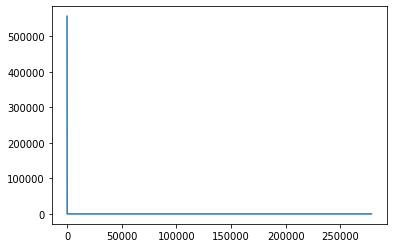

In [46]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [47]:
wavfile.write("y.wav", fs , y)